# Independent Inquiry: 
## How the amount of trials that it would have taken for a parent to ensure an escape route for her child, in first class, compares to the ones travelling in third class?

# Geometric distribution

The geometric distribution is either of two discrete probability distributions:

- The probability of the number X of Bernoulli trials needed to get one success. {1,2,3,...}
- The probability distribution of the number Y = X - 1 or failures before the first success. {0,1,2,3,..}

The geometric distribution gives the probability that the first occurrence of success requires $n$ independent trials, each with success probability $p$. If the probability of success is $p$, then the probability that the kth trial is the first success is $$Pr(X=n) = (1-p)^{n-1}p$$

For modeling the number of failures until the first success:  $$Pr(Y = n) = (1-p)^n p$$

## On the titanic data...

Let us model the attempt of parents to ensure a boat to escape for her child as a random bernoulli trial, where success is ensuring the boat and failure is not.

For simplicity, let us assume the probability of success p ressembles the probability of a child to survive, calculated through the proportion of children who survived in the tragedy.

Still, to make things interesting, let us compare the geometric distributions for children who travelled in first class against the ones who travelled in third class.

(Also let us assume factors such as the number of siblings and number of parents do not affect the distribution)

In [2]:
#Import useful packages
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pandas

def plot_geometric_distribution(p_success,nth_trials):
    p = p_success #a probability of success
    n = np.linspace(1,nth_trials,nth_trials) #trials... an array for modeling each case... but until nth_trial

    geometric_distribution = stats.geom.pmf(n,p)

    plt.bar(n,geometric_distribution)
    plt.title('Geometric distribution')
    plt.xlabel('n')
    plt.ylabel('P')
    plt.show()



In [6]:
#Import data
filename = '../Data/train.csv'
titanic_dataframe = pandas.read_csv(filename)

sample_size = len(titanic_dataframe)

def C_class_children_survival_probability(C_class):
    C_class_children_total = len(titanic_dataframe.loc[(titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == C_class)])
    C_class_children_proportion = C_class_children_total / sample_size

    C_class_children_survivors_total = len(titanic_dataframe.loc[(titanic_dataframe['Survived'] == 1) & (titanic_dataframe['Age'] <= 12) & (titanic_dataframe['Pclass'] == C_class)])
    C_class_children_survivors_proportion = C_class_children_survivors_total / sample_size

    C_class_children_survival_probability = C_class_children_survivors_proportion / C_class_children_proportion
    
    return C_class_children_survival_probability


First class


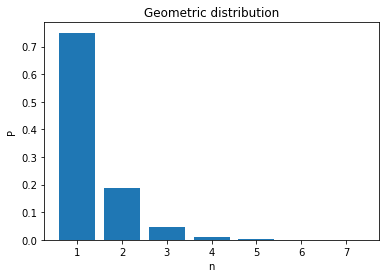

Second class


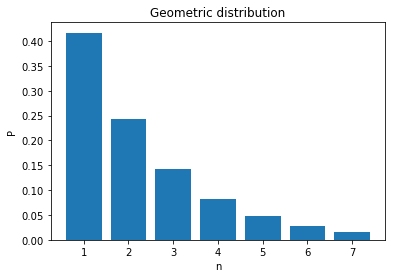

In [8]:
print('First class')
plot_geometric_distribution(C_class_children_survival_probability(1),7)
print('Second class')
plot_geometric_distribution(C_class_children_survival_probability(3),7)

# Let's try a cooler visualization of this geometric distributions

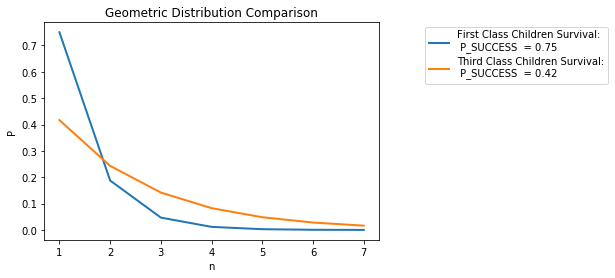

In [9]:

def plot_geometric_distributions_together(title_a,p_a,title_b, p_b, nth_trials):
        n = np.linspace(1,nth_trials,nth_trials)
        # distribution a
        distribution_a = stats.geom.pmf(n,p_a)
        plt.plot(n,distribution_a,linewidth=2,label='{title_a}:\n P_SUCCESS  = {p_a}'.format(title_a = title_a,p_a=round(p_a,2)))
        # distribution b
        distribution_b = stats.geom.pmf(n,p_b)
        plt.plot(n,distribution_b,linewidth=2,label='{title_b}:\n P_SUCCESS  = {p_b}'.format(title_b = title_b, p_b=round(p_b,2)))
        
        
        plt.title('Geometric Distribution Comparison')
        plt.legend(bbox_to_anchor = (1.7,1))
        plt.xlabel('n')
        plt.ylabel('P')
        plt.show()
        
plot_geometric_distributions_together('First Class Children Survival', C_class_children_survival_probability(1), 'Third Class Children Survival', C_class_children_survival_probability(3), 7)

# Binomial distribution

Suppose the probability of a single trial being a success is p. Then the probability of observing exactly $k$ successes in $n$ independent trials is given by $$\frac{n!}{k!(n-k)!}p^k(1-p)^{n-k}$$

1. If p is held constant, but n is changed,


In [10]:
%matplotlib inline
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


## On the Titanic Data...

A parent may have more than one children, so how many trials would parent in third class would have needed to ensure making it likely with a 95% of probability that at least three of their children would survive, in comparison to the amount of trials parents in first class needed?

For simplicity:  
▪ Let us assume each trial may be identically and independently distributed.  
▪ Let us assume, for the sake of simplicity, that we may ignore that parents may not have at least three children. Although this is a strong assumption, it allows to prove, or disprove, the following point: The attempts that parents travelling in third class needed to ensure an escape route where more than the ones parents travelling in first class.

In [13]:
# p = 0
# p_success = C_class_children_survival_probability(1)
# n = 7
# for k in range(3,n+1):
#     p += comb(n, k) * p_success**k * (1-p_success)**(n-k)
    
# print(p)

def n_for_min_successes_k_for_min_p(p_success,k_minimum):
    n = 0
    while(True):
        p = 0
        for k in range(3,n+1):
            p += comb(n, k) * p_success**k * (1-p_success)**(n-k)
        if p < 0.95:
            n += 1
        else:
            return n




        
        
    

0.987121582031


**Trials would parent in third class would have needed to ensure making it likely with a 95% of probability that at least three of their children would survive, in comparison to the amount of trials parents in first class needed?**

In [14]:
print("FIRST CLASS")
print(n_for_min_successes_k_for_min_p(C_class_children_survival_probability(1),3))  
print("THIRD CLASS")
print(n_for_min_successes_k_for_min_p(C_class_children_survival_probability(3),3))   

FIRST CLASS
6
THIRD CLASS
13


** We can observe it would more than the double of trials for a family in third class to achieve it, in comparison to a family in third class**

In [15]:
# p = 0
# p_success = C_class_children_survival_probability(3)
# n = 15
# for k in range(3,n+1):
#     p += comb(n, k) * p_success**k * (1-p_success)**(n-k)
    
# print(p)